In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

In [2]:
lc=pd.read_csv('qsar_fish_toxicity.csv',sep=";")

In [3]:
lc.head()

,3.26,0.829,1.676,0,1,1.453,3.770
0,2.189,0.580,0.863,0,0,1.348,3.115
1,2.125,0.638,0.831,0,0,1.348,3.531
2,3.027,0.331,1.472,1,0,1.807,3.510
3,2.094,0.827,0.860,0,0,1.886,5.390
4,3.222,0.331,2.177,0,0,0.706,1.819


In [4]:
lc.columns=['CIC0','SM1_Dz(Z)','GATS1i','NdsCH','NdssC','MLOGP','LC50']

In [5]:
lc.head()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50
0,2.189,0.580,0.863,0,0,1.348,3.115
1,2.125,0.638,0.831,0,0,1.348,3.531
2,3.027,0.331,1.472,1,0,1.807,3.510
3,2.094,0.827,0.860,0,0,1.886,5.390
4,3.222,0.331,2.177,0,0,0.706,1.819


In [6]:
lc.size

6349

In [7]:
lc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CIC0       907 non-null    float64
 1   SM1_Dz(Z)  907 non-null    float64
 2   GATS1i     907 non-null    float64
 3   NdsCH      907 non-null    int64  
 4   NdssC      907 non-null    int64  
 5   MLOGP      907 non-null    float64
 6   LC50       907 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 49.7 KB


In [8]:
lc.isnull().sum()

CIC0         0
SM1_Dz(Z)    0
GATS1i       0
NdsCH        0
NdssC        0
MLOGP        0
LC50         0
dtype: int64

In [9]:
lc.isna().sum()

CIC0         0
SM1_Dz(Z)    0
GATS1i       0
NdsCH        0
NdssC        0
MLOGP        0
LC50         0
dtype: int64

In [10]:
lc.describe()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50
count,907.00000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,2.89773,0.628247,1.293170,0.229327,0.485116,2.110009,4.064755
std,0.75641,0.428644,0.394315,0.605621,0.861585,1.433806,1.456469
min,0.66700,0.000000,0.396000,0.000000,0.000000,-2.884000,0.053000
25%,2.34600,0.223000,0.950500,0.000000,0.000000,1.209000,3.151500
50%,2.93100,0.570000,1.237000,0.000000,0.000000,2.127000,3.991000
75%,3.40700,0.894500,1.562000,0.000000,1.000000,3.105000,4.909000
max,5.92600,2.171000,2.920000,4.000000,6.000000,6.515000,9.612000


In [11]:
lc.skew()

CIC0         0.046915
SM1_Dz(Z)    0.696398
GATS1i       0.726043
NdsCH        3.398560
NdssC        2.240926
MLOGP       -0.036595
LC50         0.251356
dtype: float64

In [12]:
lc.duplicated().sum()

1

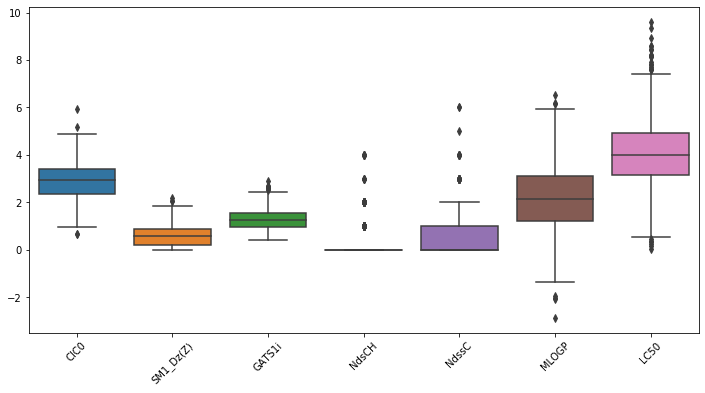

In [13]:
plt.subplots(figsize=(12, 6))
ax = sns.boxplot(data=lc)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

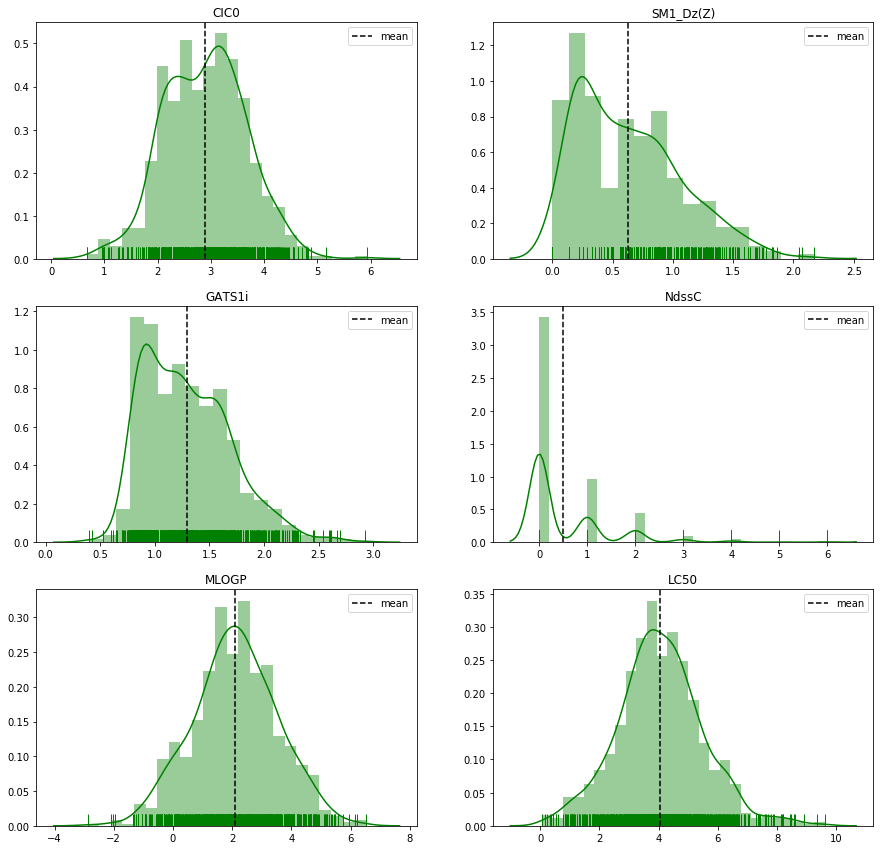

In [14]:
import itertools

cols = [i for i in lc.columns if i != 'NdsCH']

fig = plt.figure(figsize=(15, 20))

for i,j in itertools.zip_longest(cols, range(len(cols))):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(lc[i],color='green',rug=True)
    plt.axvline(lc[i].mean(),linestyle="dashed",label="mean", color='black')
    plt.legend()
    plt.title(i)
    plt.xlabel("")

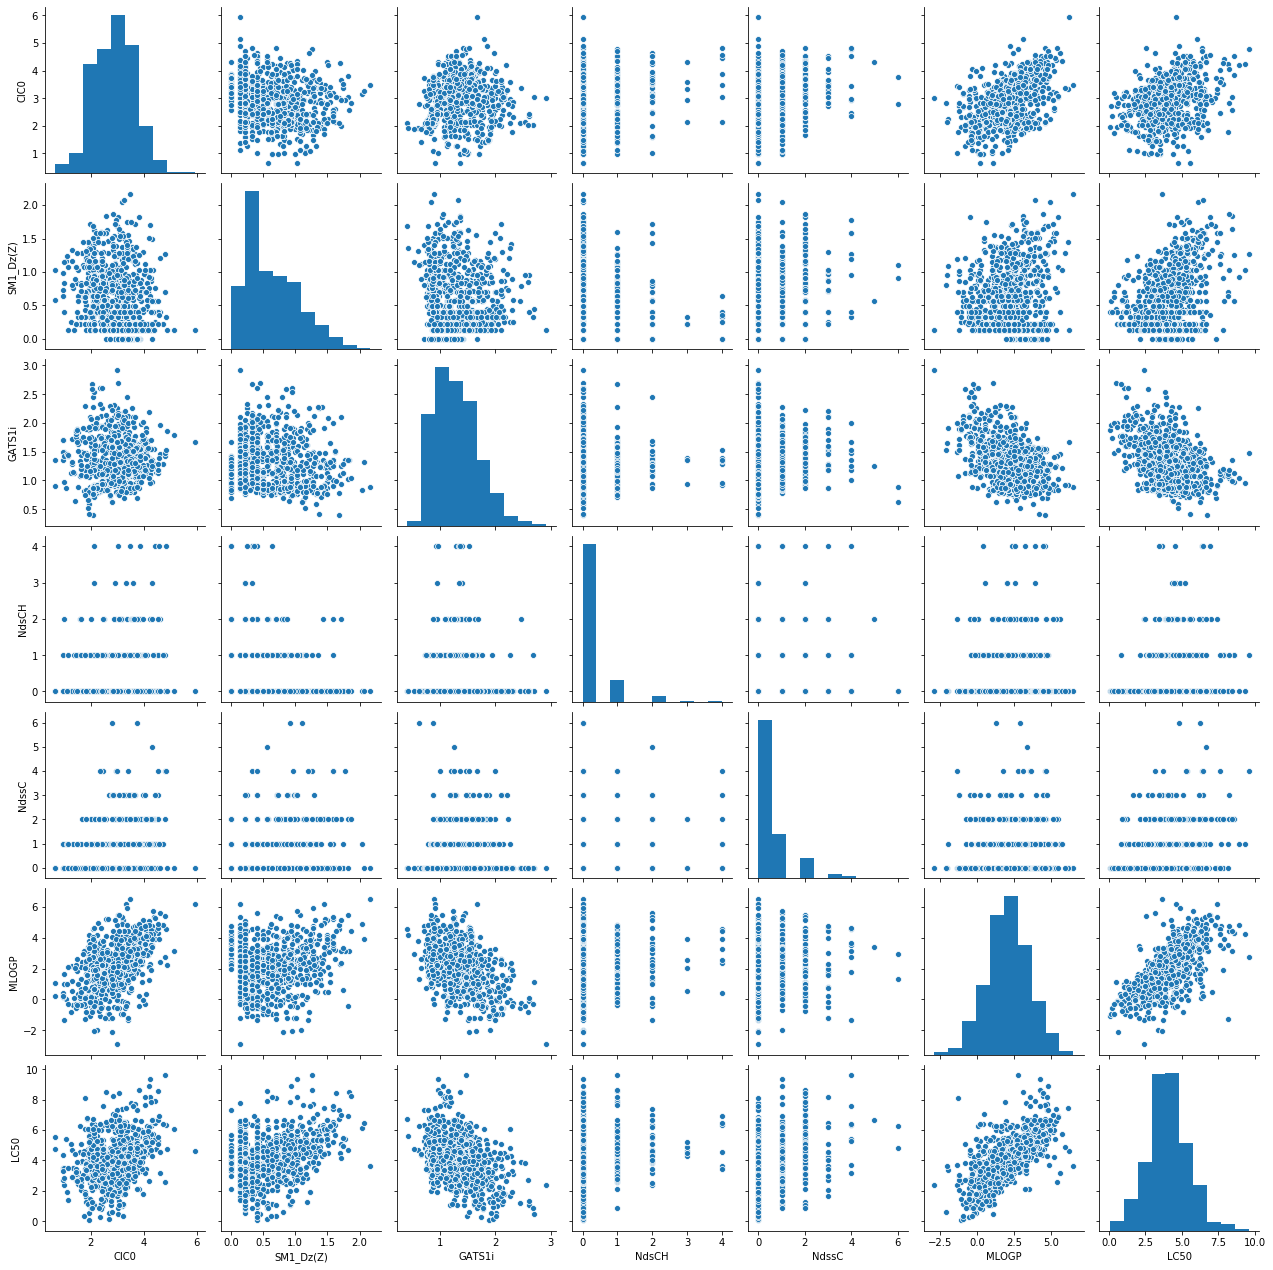

In [15]:

sns.pairplot(lc)

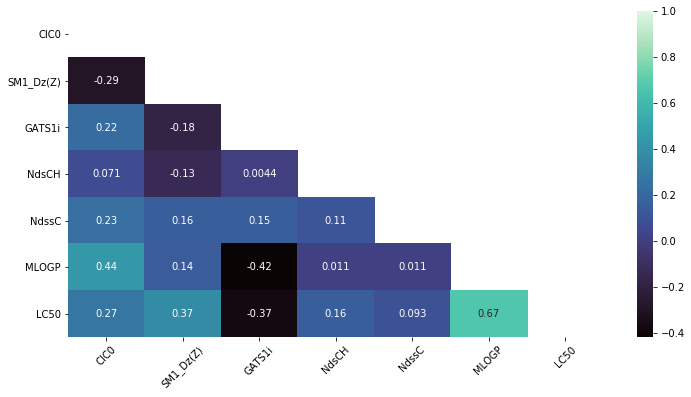

In [16]:
plt.subplots(figsize=(12, 6))
corr = lc.corr('spearman')

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(data=corr, cmap='mako', annot=True, mask=mask)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [17]:
lc.head()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50
0,2.189,0.580,0.863,0,0,1.348,3.115
1,2.125,0.638,0.831,0,0,1.348,3.531
2,3.027,0.331,1.472,1,0,1.807,3.510
3,2.094,0.827,0.860,0,0,1.886,5.390
4,3.222,0.331,2.177,0,0,0.706,1.819


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score

from sklearn.impute import SimpleImputer


In [19]:
class Regressor(object):
    """
    Class representing a regressor. 
    Based on the parameters supplied in the constructor, this class constructs a pipeline object.
    The constructed pipeline adds 
    - Standard scalar if the scale parameter is passed as True
    - Polynomial Feature transformations if the include_polymomial flag is set as True
    """
    def __init__(self, name, model, scale=True, include_polynomial=False, degree=5):
        self.name = name
        self.model = model
        steps = []
        if scale:
            steps.append(('scaler', StandardScaler()))
        if include_polynomial:
            steps.append(('poly_features', PolynomialFeatures(degree=degree)))
        steps.append(('model', model))
        self.steps = steps

    def get_name(self):
        return self.name

    def get_model(self):
        return self.model

    def get(self):
        return Pipeline(steps=self.steps)

    def feature_imp(self):
        try:
            return self.model.feature_importances_
        except AttributeError:
            try:
                return self.model.coef_
            except AttributeError:
                return None


class ModelsBuilder(object):
    '''
    This class is responsible for building the model and constructing a results dataframe.
    It accepts several regressor objects.
    '''
    def __init__(self, regressors, data, target, test_size=0.3, seed=42):
        self.regressors = regressors
        self.split_data = train_test_split(data.drop(target, axis=1), data[target], test_size=test_size, random_state=seed)
        self.data = data
        self.target = target

    def build(self, k_fold_splits=10):
        results = pd.DataFrame(columns=['model', 'training_score', 'test_score', 'k_fold_mean', 'k_fold_std'])
        for regressor in self.regressors:
            regressor.get().fit(self.split_data[0], self.split_data[2])
            cross_vals = cross_val_score(regressor.get(), self.data.drop(self.target, axis=1), self.data[self.target], cv=KFold(n_splits=k_fold_splits))
            mean = round(cross_vals.mean(), 3)
            std = round(cross_vals.std(), 3)
            results = results.append({
                'model': regressor.get_name(),
                'training_score': round(regressor.get().score(self.split_data[0], self.split_data[2]), 3),
                'test_score': round(regressor.get().score(self.split_data[1], self.split_data[3]),3), 
                'k_fold_mean': mean, 
                'k_fold_std': std, 
                '95% confidence intervals': str(round(mean-(1.96*std),3)) + ' <-> ' + str(round(mean+(1.96*std),3))
                }, ignore_index=True)

        return results


class OutliersImputer(SimpleImputer):
    '''
    This class extends the functionality of SimpleImputer to handle outliers.
    '''
    def __init__(self, strategy='mean'):
        self.strategy = strategy
        super().__init__(strategy=strategy)

    def fit(self, X, y=None):
        for i in X.columns:
            q1, q2, q3 = X[i].quantile([0.25,0.5,0.75])
            IQR = q3 - q1
            a = X[i] > q3 + 1.5*IQR
            b = X[i] < q1 - 1.5*IQR
            X[i] = np.where(a | b, np.NaN, X[i])  
        return super().fit(X, y)

In [20]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor


regressors = [
    Regressor('Linear Regression', LinearRegression(), scale=True), 
    Regressor('Linear Regression degree 2', LinearRegression(), 
              scale=True, include_polynomial=True, degree=2),
    Regressor('Linear Regression degree 3', LinearRegression(), 
              scale=True, include_polynomial=True, degree=3), 
    Regressor('Ridge', Ridge(random_state=42), scale=True), 
    Regressor('Ridge degree 2', Ridge(random_state=42), 
              scale=True, include_polynomial=True, degree=2),
    Regressor('Ridge degree 3', Ridge(random_state=42), 
              scale=True, include_polynomial=True, degree=3),
    Regressor('Lasso', Lasso(random_state=42), scale=True), 
    Regressor('Lasso degree 2', Lasso(random_state=42), 
              scale=True, include_polynomial=True, degree=2),
    Regressor('Lasso degree 3', Lasso(random_state=42), 
              scale=True, include_polynomial=True, degree=3), 
    Regressor('Decision Tree', DecisionTreeRegressor(random_state=42, max_depth=4), scale=True),
    Regressor('Bagging Regressor', BaggingRegressor(random_state=42), scale=True),
    Regressor('Ada boosting', AdaBoostRegressor(random_state=42), scale=True),
    Regressor('Random forest', RandomForestRegressor(random_state=42, max_depth=4), scale=True),
    Regressor('Gradient boosting', GradientBoostingRegressor(random_state=42, max_depth=4), scale=True),
    Regressor('xg boosting', XGBRegressor(random_state=42, max_depth=4), scale=True),
    Regressor('KNN', KNeighborsRegressor(n_neighbors=3), scale=True),
    Regressor('SVR', SVR(gamma='auto'), scale=True),
]  

In [21]:

result = ModelsBuilder(regressors, lc, 'LC50').build()
tmp_best = result.sort_values(['k_fold_mean'], ascending=False).head(1)
tmp_best['model'] = 'Best Model = ' + tmp_best['model']
result = result.append(tmp_best, ignore_index=True)
result


,model,training_score,test_score,k_fold_mean,k_fold_std,95% confidence intervals
0,Linear Regression,0.571,0.588,0.526,0.144,0.244 <-> 0.808
1,Linear Regression degree 2,0.638,0.531,0.542,0.136,0.275 <-> 0.809
2,Linear Regression degree 3,0.737,-0.165,0.344,0.326,-0.295 <-> 0.983
3,Ridge,0.571,0.588,0.526,0.144,0.244 <-> 0.808
4,Ridge degree 2,0.638,0.532,0.542,0.136,0.275 <-> 0.809
5,Ridge degree 3,0.737,-0.122,0.358,0.308,-0.246 <-> 0.962
6,Lasso,0.000,-0.000,-0.091,0.113,-0.312 <-> 0.13
7,Lasso degree 2,0.000,-0.000,-0.091,0.113,-0.312 <-> 0.13
8,Lasso degree 3,0.230,0.215,0.142,0.139,-0.13 <-> 0.414
9,Decision Tree,0.615,0.486,0.424,0.143,0.144 <-> 0.704


In [22]:
# Count outliers
q1= lc.quantile(0.25)
q3= lc.quantile(0.75)
IQR = q3-q1
outliers = pd.DataFrame(((lc > (q3+1.5*IQR)) | (lc < (q1-IQR*1.5))).sum(axis=0), columns=['No. of outliers'])
outliers['Percentage of outliers'] = round(outliers['No. of outliers']*100/len(lc), 2)
outliers

,No. of outliers,Percentage of outliers
CIC0,4,0.44
SM1_Dz(Z),3,0.33
GATS1i,7,0.77
NdsCH,148,16.32
NdssC,29,3.20
MLOGP,7,0.77
LC50,24,2.65


In [23]:
lc[['NdsCH','NdssC']] = OutliersImputer().fit_transform(lc[['NdsCH','NdssC']])

In [24]:
result_outliers_treatment = ModelsBuilder(regressors, lc, 'LC50').build()
tmp_best = result_outliers_treatment.sort_values(['k_fold_mean'], ascending=False).head(1)
tmp_best['model'] = 'Best Model = ' + tmp_best['model']
result_outliers_treatment = result_outliers_treatment.append(tmp_best, ignore_index=True)
result_outliers_treatment

,model,training_score,test_score,k_fold_mean,k_fold_std,95% confidence intervals
0,Linear Regression,0.543,0.554,0.492,0.148,0.202 <-> 0.782
1,Linear Regression degree 2,0.584,0.545,0.492,0.146,0.206 <-> 0.778
2,Linear Regression degree 3,0.692,0.515,0.531,0.095,0.345 <-> 0.717
3,Ridge,0.543,0.554,0.492,0.148,0.202 <-> 0.782
4,Ridge degree 2,0.584,0.545,0.492,0.146,0.206 <-> 0.778
5,Ridge degree 3,0.692,0.523,0.539,0.081,0.38 <-> 0.698
6,Lasso,0.000,-0.000,-0.091,0.113,-0.312 <-> 0.13
7,Lasso degree 2,0.000,-0.000,-0.091,0.113,-0.312 <-> 0.13
8,Lasso degree 3,0.215,0.205,0.125,0.132,-0.134 <-> 0.384
9,Decision Tree,0.613,0.497,0.453,0.117,0.224 <-> 0.682


In [25]:
result_feature_engg = ModelsBuilder(regressors, lc.drop(['NdsCH','NdssC'], axis=1), 'LC50').build()
tmp_best = result_feature_engg.sort_values(['k_fold_mean'], ascending=False).head(1)
tmp_best['model'] = 'Best Model = ' + tmp_best['model']
result_feature_engg = result_feature_engg.append(tmp_best, ignore_index=True)
result_feature_engg

,model,training_score,test_score,k_fold_mean,k_fold_std,95% confidence intervals
0,Linear Regression,0.541,0.550,0.492,0.150,0.198 <-> 0.786
1,Linear Regression degree 2,0.568,0.552,0.492,0.150,0.198 <-> 0.786
2,Linear Regression degree 3,0.645,0.533,0.526,0.059,0.41 <-> 0.642
3,Ridge,0.541,0.550,0.492,0.150,0.198 <-> 0.786
4,Ridge degree 2,0.568,0.552,0.492,0.150,0.198 <-> 0.786
5,Ridge degree 3,0.645,0.533,0.527,0.059,0.411 <-> 0.643
6,Lasso,0.000,-0.000,-0.091,0.113,-0.312 <-> 0.13
7,Lasso degree 2,0.000,-0.000,-0.091,0.113,-0.312 <-> 0.13
8,Lasso degree 3,0.215,0.205,0.125,0.132,-0.134 <-> 0.384
9,Decision Tree,0.613,0.497,0.453,0.122,0.214 <-> 0.692


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(lc.drop(['LC50'],axis=1),lc['LC50'], test_size = 0.2,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((725, 6), (182, 6), (725,), (182,))

In [27]:
# Prepare parameter grid
param_grid = {
    'kernel' : ('linear', 'poly', 'rbf'),'C' : [1,5,10],'degree' : [3,5],'coef0' : [0.01,10,0.5]},


In [28]:
from sklearn.model_selection import RandomizedSearchCV

rs = RandomizedSearchCV(estimator=SVR(), param_distributions=param_grid, 
                 return_train_score= True, n_jobs=-1, verbose=2, cv = 5)
rs.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
                   param_distributions=({'C': [1, 5, 10],
                                         'coef0': [0.01, 10, 0.5],
                                         'degree': [3, 5],
                                         'kernel': ('linear', 'poly', 'rbf')},),
                   return_train_score=True, verbose=2)

In [78]:
sr=SVR()
sr.fit(X_train,y_train)
print('Score: ',sr.score(X_train,y_train))
y_pred_lrtr=sr.predict(X_train)
y_pred_lrte=sr.predict(X_test)
from sklearn.metrics import r2_score
print('Train R2 score: ',r2_score(y_train,y_pred_lrtr))
print('Test R2 score: ',r2_score(y_test,y_pred_lrte))



Score:  0.6067461315769171
Train R2 score:  0.6067461315769171
Test R2 score:  0.5876207551664292


In [79]:
mean = rs.best_score_
std = rs.cv_results_['mean_test_score'].std()


print(f"Mean validation score: {mean}")
print(f"Validation standard deviation: {std}")
print(f"95% confidence interval: {str(round(mean-(1.96*std),3)) + ' <-> ' + str(round(mean+(1.96*std),3))}")
print(f"Best parameters: {rs.best_params_}")
print(f"Test score: {rs.score(X_test, y_test)}")


Mean validation score: 0.5842230526144194
Validation standard deviation: 0.026754290409895163
95% confidence interval: 0.532 <-> 0.637
Best parameters: {'kernel': 'rbf', 'degree': 3, 'coef0': 0.01, 'C': 10}
Test score: 0.582364951825073


In [80]:
sr=SVR(kernel= 'poly', degree= 3, coef0= 10, C= 10)
sr.fit(X_train,y_train)
print('Score: ',sr.score(X_train,y_train))
y_pred_lrtr=sr.predict(X_train)
y_pred_lrte=sr.predict(X_test)
from sklearn.metrics import r2_score
print('Train R2 score: ',r2_score(y_train,y_pred_lrtr))
print('Test R2 score: ',r2_score(y_test,y_pred_lrte))

Score:  0.6191291480098983
Train R2 score:  0.6191291480098983
Test R2 score:  0.5658784518115059
